## Linear Regression 
=========================

## Example 2: Linear Regression with Multiple Variables/Feature

*This example uses Gradient Descent to minimise the cost function and calculate $\theta$ with $n=2$, where $\theta$ is a vector containing the fitting parameters for the hypothesis and $n$ is the number of features. It is also shown how the Normal Equation can be used to produce the optimal result*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [200]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Import and Plot Data

Rather than generating test data, like in Example 1 with a single variable, here we are loading some existing data

In [201]:
data = np.loadtxt("../data/ex1data2.txt",delimiter=',')
x_data = data[:,[0,1]]
y_data = data[:,2]

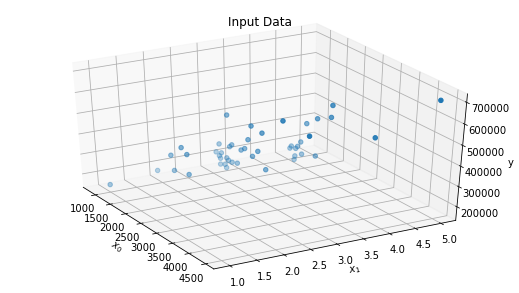

In [202]:
# #  --- Plot test data --- #
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(x_data[:,0], x_data[:,1],y_data, cmap=cm.coolwarm)
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
ax.set_zlabel('y')
plt.title('Input Data')
plt.subplots_adjust(left=0.001,right=0.99)
ax.view_init(35, -30)
plt.show()

### Size of dataset

As before, in Example 1, $m$ signifies the number of data points and $n$ is the number of features - which is now $2$ instead of just $1$

In [203]:
# size of dataset
m = len(y_data)
# n features
n = np.shape(x_data)[1] 
print "Number of data points:", m
print "Number of features in data:", n

Number of data points: 47
Number of features in data: 2


### Feature Normalisation

When dealing with more than $1$ feature it is important to apply normalisation to ensure that each feature has equal weight. 

In [204]:
def FeatureNorm(X):

    Xnorm = np.zeros(np.shape(X))

    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in xrange(X.shape[1]):
        mu[:,i]    = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        Xnorm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return Xnorm,mu,sigma

In [205]:
# Feature Scaling - normalise the features to ensure equal weighting
Xnorm,mu,sigma = FeatureNorm(x_data)
# Generate the feature matrix - add column of ones
X = np.column_stack((np.ones((m,1)), Xnorm))
# Initialise theta vector
theta = np.array(np.zeros(n+1)) 

### Cost Function

The cost function indicates how badly the hypothesis represents the actual data points. During training we try to minimise this cost.

$J(\theta) = \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x_i) - y_i))^2 $

In [206]:
def Cost(X,theta,m,y):

    h = np.dot(X,theta)
    S = np.sum((h - np.transpose(y))**2)
    J = S / (m) # or 2*m

    return J

with the initial $\theta$ vector of zeros we can calculate the cost/error of the hypothesis $h_{\theta}$

In [207]:
# initial cost
cost = Cost(X,theta,m,y_data)
print "initial cost: ", cost

initial cost:  131183096213.0


### Gradient Descent

Gradient descent is an optimisation technique used to minimise the cost function. We iteratively adjust the weights in $\theta$ to produce a better hypothesis.

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x^i) - y^i))x^i_j $

where $i$ is the training sample, $j$ is the index for each weight in $\theta$, and $\alpha$ is the learning rate which indicates how much we adjust the weights in the direction of the gradient.

In [208]:
def GradientDescent_hist(X,y,theta,alpha,iterations,m):

    Jhist = np.zeros((iterations,1))
    xTrans = X.transpose() 
    for i in xrange(iterations):
        h = np.dot(X,theta)
        errors = h - np.transpose(y)  
        theta_change = (alpha/m) * np.dot(xTrans,errors)
        theta = theta - theta_change 

        Jhist[i] = Cost(X,theta,m,y)

    return theta,Jhist

In [209]:
# -- Define hyperparameters and run Gradient Descent -- #
# learning rate
alpha = 0.01 
# No. iterations for Gradient Descent
iterations = 1000
# Run Gradient Descent
theta,Jhist = GradientDescent_hist(X,y_data,theta,alpha,iterations,m)

### Cost Convergence and Optimised weights

To check Gradient Descent is working correctly, we can plot the cost function over each iteration.

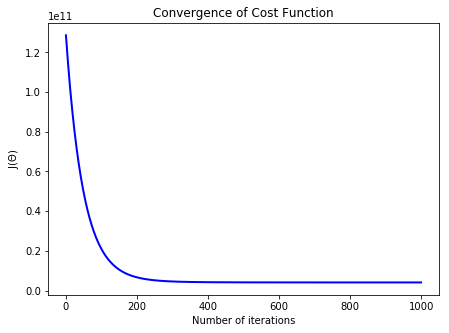

In [210]:
# Plot covergence of cost
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(xrange(Jhist.size), Jhist, "-b", linewidth=2 )
plt.title("Convergence of Cost Function")
plt.xlabel('Number of iterations')
plt.ylabel('J($\Theta$)')
plt.show()

The cost is now much lower compared to the initial $\theta$ values.

In [211]:
# Calculate the cost after fitting
cost = Cost(X,theta,m,y_data)
print "theta: ", theta, "\ncost: ", cost

theta:  [ 340397.96353532  108742.65627238   -5873.22993383] 
cost:  4086997896.29


### Plotting the hypothesis

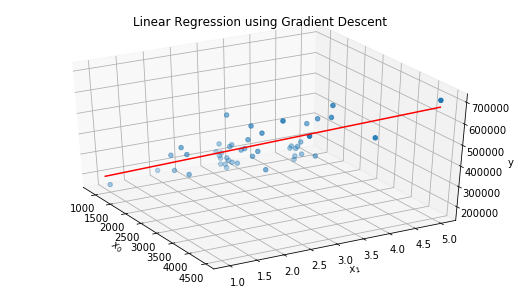

In [212]:
# plot the hypothesis with the learnt fitting values
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
x1 = np.linspace(np.min(x_data[:,0]), np.max(x_data[:,0]), 500)
x2 = np.linspace(np.min(x_data[:,1]), np.max(x_data[:,1]), 500)
x1norm = np.linspace(np.min(Xnorm[:,0]), np.max(Xnorm[:,0]), 500)
x2norm = np.linspace(np.min(Xnorm[:,1]), np.max(Xnorm[:,1]), 500)
h = np.dot(np.column_stack((np.ones(500),np.column_stack((x1norm,x2norm)) )),theta) 
ax.scatter(x_data[:,0], x_data[:,1],y_data, cmap=cm.coolwarm)
ax.plot(x1,x2,h,c='r',linewidth=1.5)
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
ax.set_zlabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.subplots_adjust(left=0.001,right=0.99)
ax.view_init(35, -30)

### Normal Equation

An alternative approach to Gradient Descent is to use the Normal Equation.

$\theta = (X^{T}X)^{-1}X^{T}y$

The Normal Equation will give you the exact solution without iterative optimisation. However, as the number of features $n$ increases, inverting matrix $X$ becomes highly computational. In this example we are only using Linear Regression with two variables/features - so it is still pretty efficient!

In [213]:
def NormEq(X,y):
    return np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

In [214]:
# Generate the feature matrix - add column of ones
X = np.column_stack((np.ones((m,1)), x_data))

# Use Normal Equation
theta_normal = NormEq(X,y_data)

# Calculate the cost after fitting
cost = Cost(X,theta_normal,m,y_data)
print "theta: ", theta_normal, "\ncost: ", cost

theta:  [ 89597.90954361    139.21067402  -8738.01911255] 
cost:  4086560101.21


Our $\theta$ values are very different to the ones calculated using Gradient Descent. The reason for this is because we don't use Feature Normalisation with the Normal Equation.

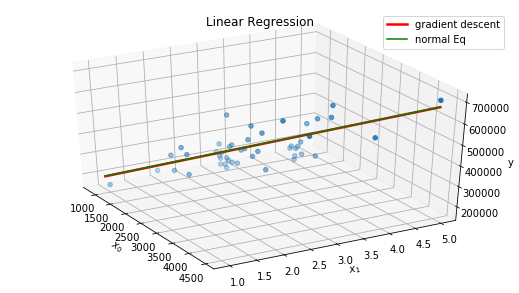

In [215]:
# plot the hypothesis with the learnt fitting values
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
x1 = np.linspace(np.min(x_data[:,0]), np.max(x_data[:,0]), 500)
x2 = np.linspace(np.min(x_data[:,1]), np.max(x_data[:,1]), 500)
x1norm = np.linspace(np.min(Xnorm[:,0]), np.max(Xnorm[:,0]), 500)
x2norm = np.linspace(np.min(Xnorm[:,1]), np.max(Xnorm[:,1]), 500)
h_gradient = np.dot(np.column_stack((np.ones(500),np.column_stack((x1norm,x2norm)) )),theta) 
h_normal   = np.dot(np.column_stack((np.ones(500),np.column_stack((x1,x2)) )),theta_normal) 
ax.scatter(x_data[:,0], x_data[:,1],y_data, cmap=cm.coolwarm)
ax.plot(x1,x2,h_gradient,c='r',linewidth=2.5,label="gradient descent")
ax.plot(x1,x2,h_normal,c='g',linewidth=1.5,label="normal Eq")
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
ax.set_zlabel('y')
plt.title('Linear Regression')
plt.legend()
plt.subplots_adjust(left=0.001,right=0.99)
ax.view_init(35, -30)
plt.show()